<a href="https://colab.research.google.com/github/andre-arantes/ia/blob/master/tp1/etapa4/codigo_A_melhorado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto de Previsão de Diabetes

Este projeto tem como objetivo prever a probabilidade de uma pessoa ter diabetes com base em vários fatores, como idade, nível de HbA1c, nível de glicose no sangue e gênero. O conjunto de dados usado neste projeto é o Diabetes Prediction Dataset.

Usaremos o algoritmo Decision Tree para treinar nosso modelo e prever a probabilidade de diabetes. Também usaremos várias técnicas de pré-processamento de dados, como subamostragem, para melhorar a precisão do nosso modelo.

**Atualizando a biblioteca para plotagem de gráficos**


In [ ]:
#!pip -q install plotly --upgrade
#!pip -q install yellowbrick

**Importando bibliotecas**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.tree import DecisionTreeClassifier

**Abrindo um arquivo CSV do drive**

In [ ]:
base = pd.read_csv('sample_data/diabetes_prediction_dataset.csv', usecols=['gender','age','hypertension','heart_disease','smoking_history','bmi','HbA1c_level','blood_glucose_level','diabetes'])

In [ ]:
base

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


**Contando quantidade de instâncias**


In [ ]:
np.unique(base['diabetes'], return_counts=True)

(array([0, 1]), array([91500,  8500]))

**Separando os atributos de entrada e de classe**

In [ ]:
X = base.copy()
y = X.pop('diabetes')

# Pré processamento de dados

**Remover Dados ausentes**

Remover campo 'smoking_history' devido a 35% de dados ausentes

In [ ]:
# remover campo 'smoking_history' devido a quantidade de informações faltantes
X.drop('smoking_history',axis=1,inplace=True)

**Tratamento de dados categóricos**


> *LabelEncoder - Vamos tratar os dados categóricos colocando 1, 2, 3 e etc**



In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
label_encoder_gender = LabelEncoder()
X.iloc[:,0] = label_encoder_gender.fit_transform(X.iloc[:,0])

<ipython-input-11-95925dbb60df>:4: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  X.iloc[:,0] = label_encoder_gender.fit_transform(X.iloc[:,0])


**Divisão dos dados em treino e teste**

foi feita a divisão dos dados em 80\% para treino e 20\% para teste.

In [ ]:
X

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level
0,0,80.0,0,1,25.19,6.6,140
1,0,54.0,0,0,27.32,6.6,80
2,1,28.0,0,0,27.32,5.7,158
3,0,36.0,0,0,23.45,5.0,155
4,1,76.0,1,1,20.14,4.8,155
...,...,...,...,...,...,...,...
99995,0,80.0,0,0,27.32,6.2,90
99996,0,2.0,0,0,17.37,6.5,100
99997,1,66.0,0,0,27.83,5.7,155
99998,0,24.0,0,0,35.42,4.0,100


In [ ]:
y

0        0
1        0
2        0
3        0
4        0
        ..
99995    0
99996    0
99997    0
99998    0
99999    0
Name: diabetes, Length: 100000, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size = 0.20, random_state = 42)

**Balanciamento de dados**

Para o balanceamento de dados, foi verificado que haviam muitas instâncias da classe majoritária, então foi decidido implementar o undersampling na base de treino.

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
# balanceia a base de dados de forma que a base majoritaria fique 40% maior
us=RandomUnderSampler(sampling_strategy=0.4)
X_treino,y_treino = us.fit_resample(X_treino,y_treino)

In [ ]:
X_treino.shape

(23772, 7)

In [ ]:
X_teste.shape

(20000, 7)

**indetificação de outliers**

Outliers de age

In [ ]:
Q1 = X['age'].quantile(0.25)
Q3 = X['age'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
print(Q1)
print(Q3)
print(IQR)
print(lower)
print(upper)

24.0
60.0
36.0
-30.0
114.0


In [ ]:
upper_array_age = np.where(X['age']>=upper)[0]
upper_array_age

array([], dtype=int64)

Outliers de bmi

In [ ]:
Q1 = X['bmi'].quantile(0.25)
Q3 = X['bmi'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
print(Q1)
print(Q3)
print(IQR)
print(lower)
print(upper)

23.63
29.58
5.949999999999999
14.705
38.504999999999995


In [ ]:
upper_array_bmi = np.where(X['bmi']>=upper)[0]
upper_array_bmi

array([   11,    39,    59, ..., 99953, 99960, 99993])

In [ ]:
lower_array_bmi = np.where(X['bmi']<=lower)[0]
lower_array_bmi

array([   24,   155,   221, ..., 99841, 99906, 99933])

Outliers de HbA1c_level

In [ ]:
Q1 = X['HbA1c_level'].quantile(0.25)
Q3 = X['HbA1c_level'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
print(Q1)
print(Q3)
print(IQR)
print(lower)
print(upper)

4.8
6.2
1.4000000000000004
2.6999999999999993
8.3


In [ ]:
upper_array_HbA1c_level = np.where(X['HbA1c_level']>=upper)[0]
upper_array_HbA1c_level

array([   40,    55,    59, ..., 99706, 99740, 99929])

In [ ]:
lower_array_HbA1c_level = np.where(X['HbA1c_level']<=lower)[0]
lower_array_HbA1c_level


array([], dtype=int64)

Outliers de blood_glucose_level

In [ ]:
Q1 = X['blood_glucose_level'].quantile(0.25)
Q3 = X['blood_glucose_level'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
print(Q1)
print(Q3)
print(IQR)
print(lower)
print(upper)

100.0
159.0
59.0
11.5
247.5


In [ ]:
upper_array_blood_glucose_level = np.where(X['blood_glucose_level']>=upper)[0]
upper_array_blood_glucose_level

array([   38,    94,   104, ..., 99867, 99938, 99957])

In [ ]:
lower_array_blood_glucose_level = np.where(X['blood_glucose_level']<=lower)[0]
lower_array_blood_glucose_level

array([], dtype=int64)

**tratamento de outliers**

In [ ]:
temp = np.unique(np.concatenate((upper_array_age,lower_array_bmi),0))
temp = np.unique(np.concatenate((temp,upper_array_bmi),0))
temp = np.unique(np.concatenate((temp,upper_array_HbA1c_level),0))
temp = np.unique(np.concatenate((temp,lower_array_HbA1c_level),0))
temp = np.unique(np.concatenate((temp,upper_array_blood_glucose_level),0))
temp = np.unique(np.concatenate((temp,lower_array_blood_glucose_level),0))
X.drop(index=temp, inplace=True)
y.drop(index=temp, inplace=True)

**Vamos experimentar agora o algoritmo Decision Tree?**

In [ ]:
modelo = DecisionTreeClassifier(criterion='entropy')
Y = modelo.fit(X_treino, y_treino)

**Vamos testar o modelo?**

In [ ]:
previsoes = modelo.predict(X_teste)

**Será se o modelo acertou?**

In [ ]:
y_teste

75721    0
80184    0
19864    0
76699    0
92991    1
        ..
32595    0
29313    0
37862    0
53421    0
42410    0
Name: diabetes, Length: 20000, dtype: int64

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy_score(y_teste,previsoes)

0.91865

In [ ]:
from yellowbrick.classifier import ConfusionMatrix
confusion_matrix(y_teste, previsoes)

array([[16958,  1334],
       [  293,  1415]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.91865

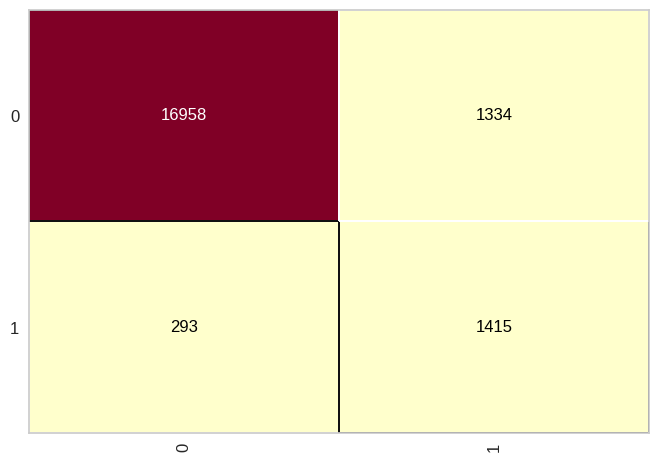

In [ ]:
cm = ConfusionMatrix(modelo)
cm.fit(X_treino, y_treino)
cm.score(X_teste, y_teste)

In [ ]:
print(classification_report(y_teste, previsoes))

              precision    recall  f1-score   support

           0       0.98      0.93      0.95     18292
           1       0.51      0.83      0.63      1708

    accuracy                           0.92     20000
   macro avg       0.75      0.88      0.79     20000
weighted avg       0.94      0.92      0.93     20000



In [ ]:
classification_report(y_teste, previsoes, output_dict=True)['accuracy']

0.91865